# **Laboratorio 2:** Procesamiento de puntos
**Programa:** [Bootcamp en Visión Artificial para los ODS](https://github.com/EdwinTSalcedo/Bootcamp-Computer-Vision-for-the-SDGs) - **Autor:** [Edwin Salcedo](https://github.com/EdwinTSalcedo)


En el laboratorio anterior, aprendiste los fundamentos de la manipulación de imágenes y el aislamiento del color. En este tutorial, aprenderás a implementar métodos de procesamiento de puntos con el objetivo de mejorar las imágenes para las siguientes etapas de procesamiento y detección.

El procesamiento de puntos nos ayuda a manipular cada píxel de una imagen mediante la aplicación de una transformación, la cual está definida por $g(x, y) = T [f(x, y)]$, donde $g(x, y)$ es la imagen resultante.

Tomemos en cuenta que nuestra clase es corta, por lo que sólo procesaremos imágenes en escala de grises en esta ocasión. Sin embargo, veremos ejemplos con imágenes a colores en las siguientes sesiones. 

## 1. Transformación negativa

La primera transformación invierte la transformación de identidad, con el objetivo de obtener el negativo de una imagen. Para ello, a cada píxel de la imagen de entrada se le resta de $L-1$ y es mapeado a una imagen de salida, donde $L = 2^k$ y $k$ es igual al número de bits necesarios para representar un píxel.

Como se explicó anteriormente, si los píxeles de una imagen guardan sólo 6 niveles de gris, necesitaremos 3 bits, esto porque podemos guardar hasta 7 niveles de gris (111 en binario), de lo contrario, tendríamos que considerar 4 o más bits. Normalmente, guardamos hasta 256 valores de gris por píxel: $L = 2^8$, es decir, 8 bits. 

En el caso de las imágenes a color, puedes considerar que tendremos que repetir el procedimiento descrito en el anterior párrafo 3 veces. En consecuencia, cada píxel de una imagen a color debería guardarse en 24 píxeles (8 píxeles para el canal R, 8 píxeles para el canal G, 8 píxeles para el canal B).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import requests
import shutil
from google.colab import files, drive
import zipfile

%matplotlib inline

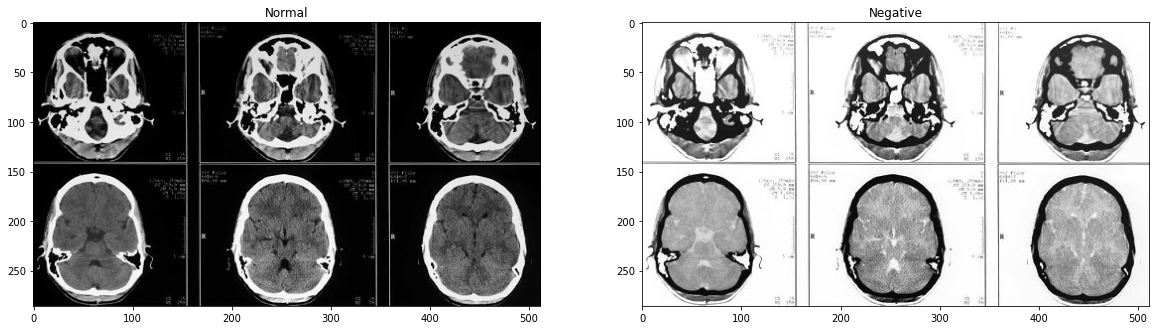

In [ ]:
# Leer y convertir la imagen a escala de grises
imagen = cv2.imread("ct.jpg")
imagen = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)

# bitwise(bit-a-bit) nos permite realizar operaciones and(y), or(o), not(no). bitwise_not(no bit-a-bit) negará los valores. 
imagen_negativa = 255 - imagen

# Mostramos ambas imágenes
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10)) 
ax1.set_title('Normal')
ax1.imshow(imagen, cmap='gray')
ax2.set_title('Negativa')
ax2.imshow(imagen_negativa, cmap='gray')

## 2. Transformación exponencial o de ley de potencia

Esta transformación puede ayudar a realizar correcciones en los niveles de intensidad de una imagen. Por ejemplo, si la foto se tomó en un día muy soleado u oscuro.

La transformación se define mediante la siguiente fórmula: $T(f)= (f(x,y)+esp)^γ$, donde $esp$ y $γ$ las definimos nosotros. 





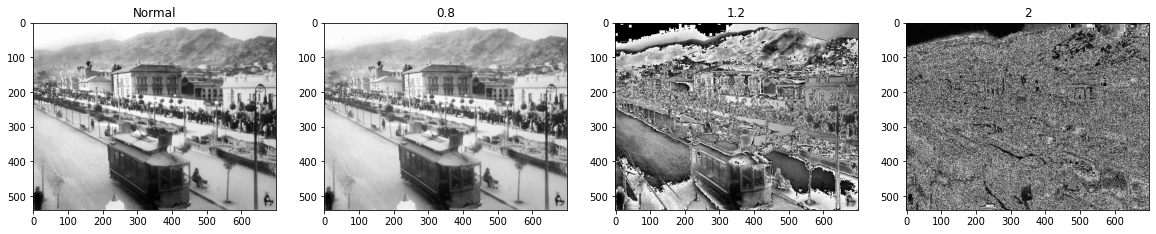

In [ ]:
# Leer y convertir la imagen a escala de grises
imagen = cv2.imread("lapaz.jpg")
imagen = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)

gammas = [0.8, 1.2, 2]

gammas_corregidos = []

for gamma in gammas: 
      
    # Aplicamos la corrección gamma. 
    gammas_corregidos.append(np.array((imagen+1) ** gamma, dtype = 'uint8'))
  

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,10)) 
ax1.set_title('Normal')
ax1.imshow(imagen, cmap='gray')
ax2.set_title(gammas[0])
ax2.imshow(gammas_corregidos[0], cmap='gray')
ax3.set_title(gammas[1])
ax3.imshow(gammas_corregidos[1], cmap='gray')
ax4.set_title(gammas[2])
ax4.imshow(gammas_corregidos[2], cmap='gray')

## 3. Ecualización del histograma (HE)

Esta transformación nos permite equilibrar el contraste de una imagen, de esta manera, esperamos obtener un conjunto de datos más uniforme.

La ecualización de histogramas es una forma de distribuir las intensidades de los píxeles de una imagen de una manera más uniforme. Para ello, se puede utilizar un gráfico de frecuencias acumuladas de la imagen para transformar sus intensidades.

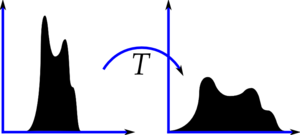

Existen dos métodos principales a la hora de aplicar la ecualización de histogramas: usando una función directa de OpenCV y procesando cada paso individualmente desde cero. Veamos el primero para un mejor entendimiento. 

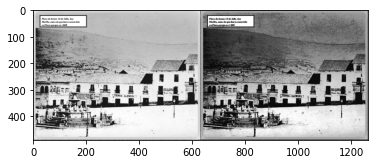

In [ ]:
# Leemos una imagen en escala de grises
img = cv2.imread('murillo_square.jpg',0)

# Obtenemos una imagen ecualizada
ecu = cv2.equalizeHist(img)

# Apilamos las imágenes una al lado de la otra
resp = np.hstack((img,ecu)) 

plt.rcParams["figure.figsize"] = (15,4)
plt.imshow(resp,cmap="gray")

## 4. Ecualización del histograma Adaptativo Limitado por Contraste (CLAHE)

CLAHE es una extensión al método clásico de Ecualización de Histograma (HE). Este tiene la finalidad de mejorar los puntos débiles de HE y obtener mejores resultados considerando las regiones locales de una imagen. 

En la actualidad, existen dos enfoques para implementar este algoritmo. Por un lado, uno divide la imagen en segmentos de 8x8 o 16x16, y aplica Ecualización de Histograma en cada uno de ellos. Sin embargo, antes requiere evaluar cada segmento y limitar los niveles del histograma, para luego distribuir los valores sobrantes. Una vez concluido este proceso, se termina de aplicar Ecualización de Histograma y también Interpolación para reducir las diferencias entre segmento a segmento. 

Por otra parte, también existe el enfoque orientado a procesar toda la imagen con filtros, también denominados kernels, deslizando estos sobre todos los pixeles de una imagen. Por cada deslizamiento, se aplica la Ecualización de Histograma, lo que significa que un objeto muy claro que se encuentra en cualquier parte de la imagen no afectará el contraste de toda la imagen.

En esta ocasión, también nos enfocaremos en aplicar CLAHE con el algoritmo implementado en OpenCV.

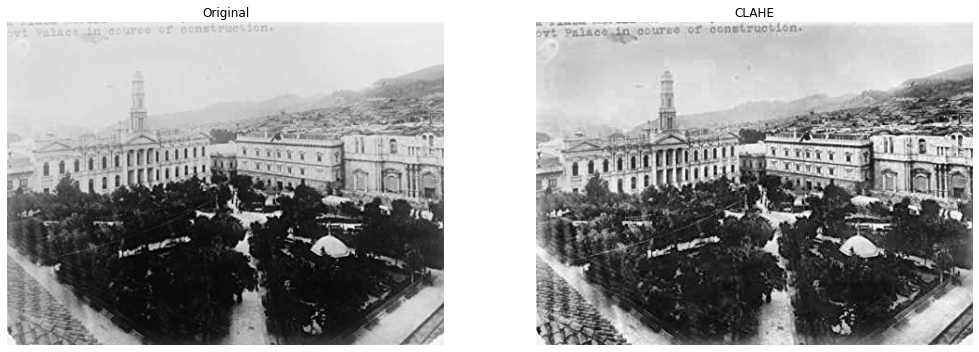

In [ ]:
# Cargar una imagen
image = cv2.imread("old.jpg",0)

image_base = np.array(image, copy=True)

# Implementar CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(image)

# Mostrar resultados
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)
ax1.set_title("Original")
ax2.set_title("CLAHE")

ax1.set_axis_off()
ax1.imshow(image_base, cmap='gray')
ax2.set_axis_off()
ax2.imshow(cl1, cmap='gray')

fig.tight_layout()
plt.show()


## **Ejercicio 1:** Modelos de colores

Implemente las siguientes conversiones con ejemplos y sin utilizar funciones de la librería OpenCV:

* RGB → HSV
* HSV → RGB
* RGB → CMYK
* CMYK → RGB
* RGB → LAB
* LAB → RGB
* RGB → Y'CrCb
* Y'CrCb → RGB

Tome en cuenta que visualizar imágenes en otros modelos de colores diferentes a RGB en Colab a menudo es difícil, por lo que se sugiere separar los canales y mostrarlos individualmente en escala de grises. 

## **Ejercicio 2:** Ecualización de histogramas

Aunque la aplicación de las funciones de OpenCV facilita el procesamiento de imágenes, una buena practica es implementar los algoritmos uno mismo. Esto tiene el objetivo de entender el funcionamiento interno de un método, e incluso brinda oportunidades a proponer mejoras al mismo. En consecuencia, ahora debes implementar el método de la Ecualización del Histograma. Considera los siguientes pasos: 

- Cargar una imagen y convertirla a escala de grises.
- Calcular el histograma de frecuencia de niveles de gris.
- Calcular la probabilidad acumulada de la imagen en escala de grises. Considera la función numpy **cumsum**. 
- Obtener la probabilidad acumulada de dicha intensidad, multiplicada por la intensidad máxima de cada intensidad.
- Redondear y sustituir los valores obtenidos en una nueva versión de la imagen.
- Mostrar la imagen final.

Al finalizar, se sugiere evaluar los resultados de su método contra los resultados del método de OpenCV.

## **Ejercicio 3:** Mejora la imagen 

Seleccione una de las imágenes con ruido, disponibles en: https://drive.google.com/drive/folders/12cbG23XbzMBvot5UyML8l1z61GLHm53T?usp=sharing, y ponga en práctica uno o varios métodos explicados anteriormente para mejorar la imagen. Para este ejercicio, también puedes aplicar CLAHE si lo ves conveniente. 

**Recibirás créditos adicionales si investigas otro método de procesamiento puntual que pueda ser útil para la imagen. Por último, recuerda que estamos trabajando principalmente con imágenes en escala de grises.**